In [2]:
import pandas as pd
df=pd.read_csv("netflix_titles.csv")

In [3]:
import mysql.connector

config = {
    'user': 'root',
    'password': 'Priyansh@123',
    'host': 'localhost',
    'database': 'netflix_etl'
}

try:
    # Establish a database connection
    connection = mysql.connector.connect(**config)
    
    if connection.is_connected():
        cursor = connection.cursor()
        
        # Prepare SQL insert statement
        insert_query = """
        INSERT INTO Shows (show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """
        
        # Iterate over the DataFrame and insert records
        for row in df.itertuples(index=False):
            cursor.execute(insert_query, row)
        
        # Commit the transaction
        connection.commit()
        print("Data uploaded successfully.")

except Error as e:
    print(f"Error: {e}")

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()


NameError: name 'Error' is not defined

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
from textblob import TextBlob

In [5]:
df=pd.read_csv("netflix_titles.csv")

In [6]:
df.shape

(8807, 12)

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# count thr null values in the data set
null_counts = df.isnull().sum()

In [9]:
print(null_counts)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


# EDA

In [15]:
netflix_data=pd.read_csv("netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
netflix_shows=netflix_data[netflix_data['type']=='TV Show']
netflix_movies=netflix_data[netflix_data['type']=='Movie']

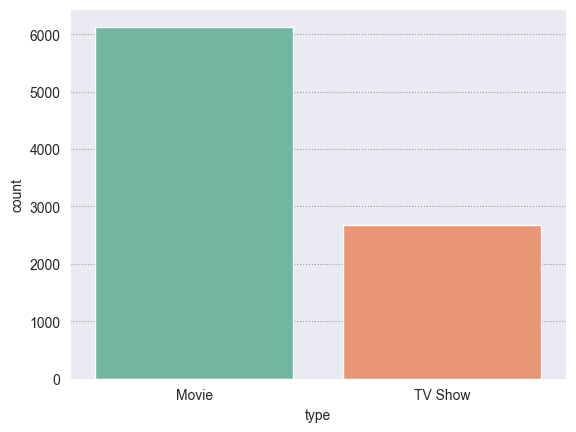

In [18]:
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.countplot(x="type", data=netflix_data, palette="Set2")

# Rating

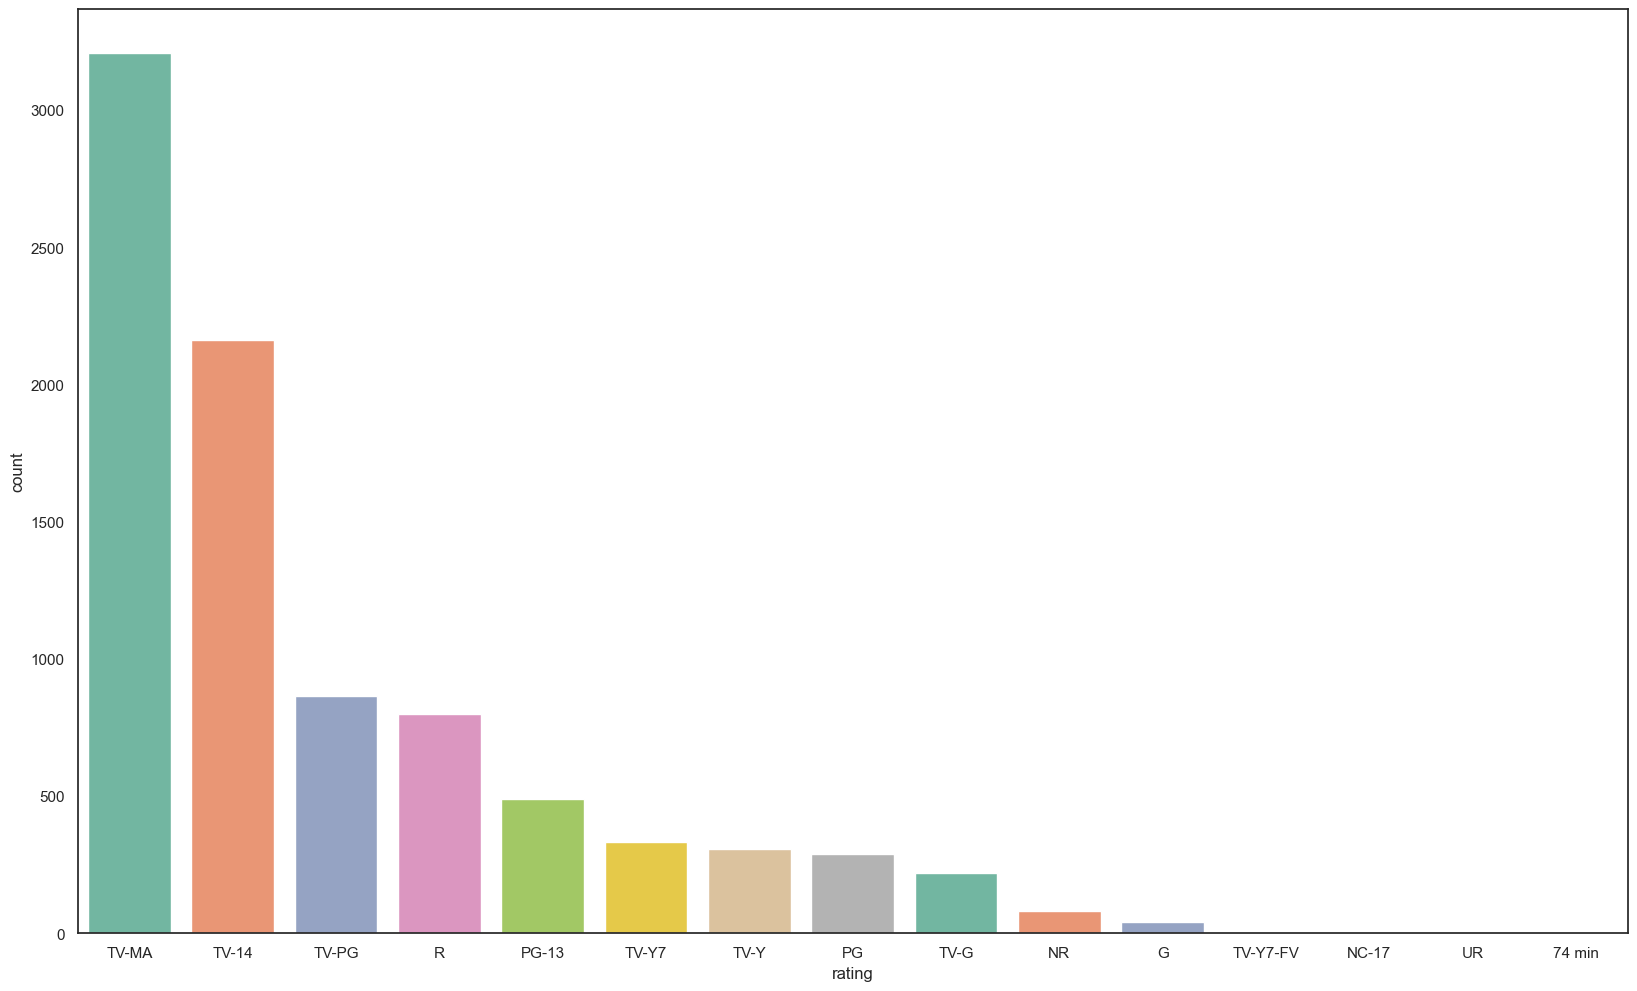

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
sns.set(style="white")
ax = sns.countplot(x="rating", data=netflix_data, palette="Set2", order=netflix_data['rating'].value_counts().index[0:15])

By this countplot of ratings we can realize that TV-MA ( Mature Audiences ) contents have the highest rating numbers. Then it gets lower as in order TV-14 ( Material that parents or adult guardians may find unsuitable for children under the age of 14 ) and TV-PG ( Parental Guideness ).¶

# Year

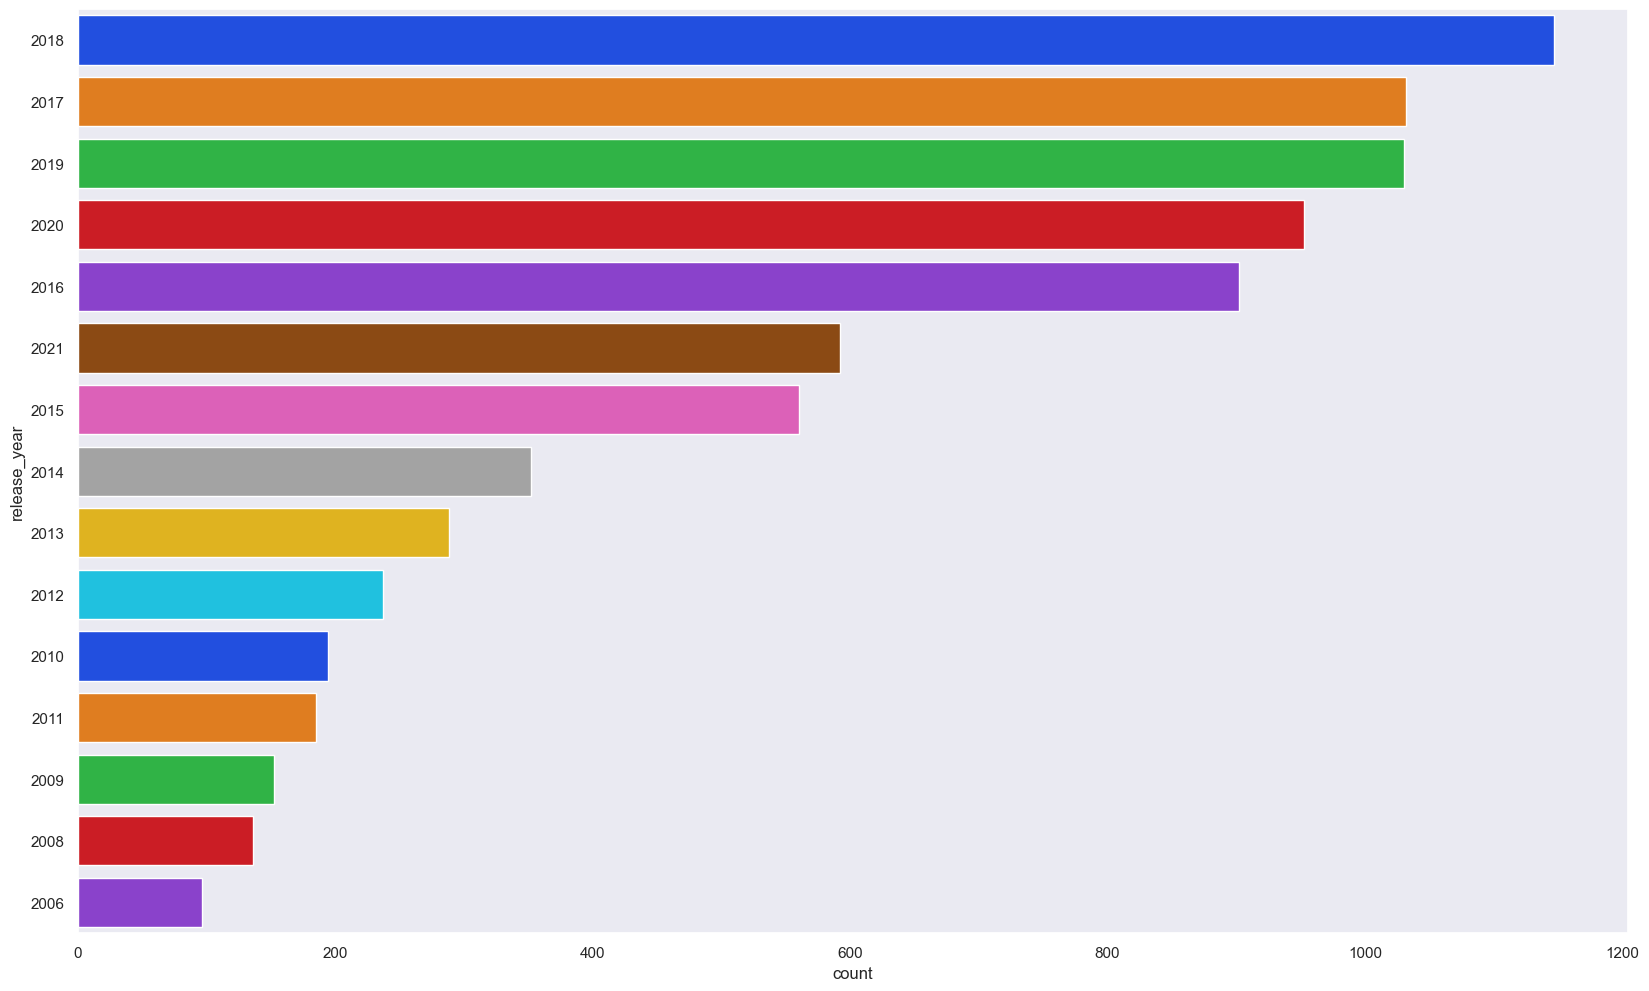

In [21]:
plt.figure(figsize=(20,12))
sns.set(style="dark")
ax = sns.countplot(y="release_year", data=netflix_data, palette="bright", order=netflix_data['release_year'].value_counts().index[0:15])


This plot shows that most of the contents were produced in 2018 and 2017. Interesting fact is in 2019, 2020 and 2021 the number of produced contents are low. This is mostly because Covid-19 pandemic

## Pie chart based on the ratings

In [10]:
x=df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


In [11]:
piechart = px.pie(x,values='counts',names='rating',title='Distribution of content rating on netflix')


In [12]:
piechart = px.pie(
    x,
    values='counts',
    names='rating',
    title='Distribution of Content Rating on Netflix',
    color_discrete_sequence=px.colors.qualitative.Plotly,  # Change color palette
    hover_data={'counts': True, 'rating': True},  # Show counts on hover
)

# Customize the layout
piechart.update_traces(textposition='inside', textinfo='percent+label', pull=[0.1]*len(x['rating']))  # Explode all sections
piechart.update_layout(
    title_font=dict(size=24, family='Arial', color='black'),  # Title customization
    legend=dict(title='Content Ratings', orientation='v', yanchor='top', y=1, xanchor='left', x=1.1),  # Legend on the right
    margin=dict(l=20, r=20, t=50, b=20)  # Adjust margins
)

piechart.show()

## Analyzing the top 5 Directors on Netflix

In [13]:
df['director']=df['director'].fillna('director not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
directors_list =pd.DataFrame()


In [15]:
directors_list = df['director'].str.split(',', expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0    director not specified
2     0           Julien Leclercq
3     0    director not specified
4     0    director not specified
                    ...          
8802  0             David Fincher
8803  0    director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [16]:
directors_list = directors_list.to_frame()
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0  director not specified
2    0         Julien Leclercq
3    0  director not specified
4    0  director not specified
...                        ...
8802 0           David Fincher
8803 0  director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [17]:
directors_list.columns = ['Director']
print(directors_list)

                      Director
0    0         Kirsten Johnson
1    0  director not specified
2    0         Julien Leclercq
3    0  director not specified
4    0  director not specified
...                        ...
8802 0           David Fincher
8803 0  director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [18]:
directors = directors_list.groupby(['Director']).size().reset_index(name='Total Count')
print(directors)
     

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [29]:
directors = directors[directors.Director != 'director not specified']
     

print(directors)

            Director  Total Count
4020   Rajiv Chilaka           22
261        Jan Suter           18
4067     Raúl Campos           18
4651     Suhas Kadav           16
3235    Marcus Raboy           16
...              ...          ...
5062  Yesim Ustaoglu            1
5063   Yeung Yat-Tak            1
5064    Yibrán Asuad            1
5065    Yin Chen-hao            1
2560   Joaquín Mazón            1

[5120 rows x 2 columns]


In [30]:

directors = directors.sort_values(by=['Total Count'], ascending = False)
print(directors)


              Director  Total Count
4020     Rajiv Chilaka           22
261          Jan Suter           18
4067       Raúl Campos           18
4651       Suhas Kadav           16
3235      Marcus Raboy           16
...                ...          ...
2338  Iñaki Dorronsoro            1
2339        J Blakeson            1
2340          J. Davis            1
2341   J. Lee Thompson            1
2560     Joaquín Mazón            1

[5120 rows x 2 columns]


In [31]:
top5Directors = directors.head()
print(top5Directors)

           Director  Total Count
4020  Rajiv Chilaka           22
261       Jan Suter           18
4067    Raúl Campos           18
4651    Suhas Kadav           16
3235   Marcus Raboy           16


In [32]:
top5Directors = top5Directors.sort_values(by=['Total Count'])

barChart = px.bar(
    top5Directors,
    x='Total Count',
    y='Director',
    title='Top 5 Directors on Netflix',
    color='Director',
    color_discrete_sequence=px.colors.qualitative.Plotly,
    hover_data={'Total Count': True, 'Director': True}
)

barChart.update_traces(texttemplate='%{y}', textposition='outside')  # Display director names outside the bars
barChart.update_layout(
    title_font=dict(size=24, family='Arial', color='black'),
    xaxis_title='Total Count',
    yaxis_title='Directors',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),  # Add gridlines for better readability
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    legend_title='Directors',
    margin=dict(l=20, r=20, t=50, b=20),
    height=400,  # Set a specific height for better proportions
)

barChart.show()


C:\Users\Priyansh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotly\express\_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [35]:
df['cast'] = df['cast'].fillna('No cast specified')
cast_df = pd.DataFrame()

cast_df = df['cast'].str.split(',',expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']

actors = cast_df.groupby(['Actor']).size().reset_index(name='Total Count')

# actors =actors[actors.Actor !='No cast specified']


actors = actors[actors['Actor'] != 'No cast specified']
actors = actors.sort_values(by='Total Count', ascending=False)

top5Actors = actors.head()

barChart2 = px.bar(
    top5Actors,
    x='Total Count',
    y='Actor',
    title='Top 5 Actors',
    color='Total Count',
    color_continuous_scale=px.colors.sequential.Plasma,
    labels={'Total Count': 'Total Appearances', 'Actor': 'Actor'},
    text='Total Count'
)

barChart2.update_traces(texttemplate='%{text}', textposition='outside')
barChart2.update_layout(
    xaxis_title='Total Appearances',
    yaxis_title='Actor',
    title_x=0.5,
    title_font_size=20,
    margin=dict(l=40, r=40, t=60, b=40)
)

barChart2.show()

## Analyzing the content produced on netflix based on years

In [23]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')

In [24]:
print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


In [25]:
df2 = df2[df2['Release Year']>=2000]
graph = px.line(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Netfilx Every Year")
graph.show()

C:\Users\Priyansh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotly\express\_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [26]:
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns = {'release_year':'Release Year', 'description':'Description'})
for index, row in df3.iterrows():
  d=row['Description']
  testimonial = TextBlob(d)
  p = testimonial.sentiment.polarity
  if p==0:
    sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'
  df3.loc[[index, 2], 'Sentiment']=sent

df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Count')

df3 = df3[df3['Release Year']>2005]
barGraph = px.bar(df3, x="Release Year", y="Total Count", color = "Sentiment", title = "Sentiment Analysis of Content on Netflix")
barGraph.show()

C:\Users\Priyansh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotly\express\_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Recommedation Sytem 

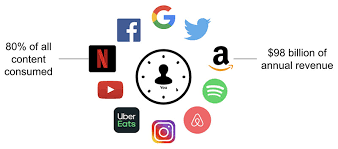
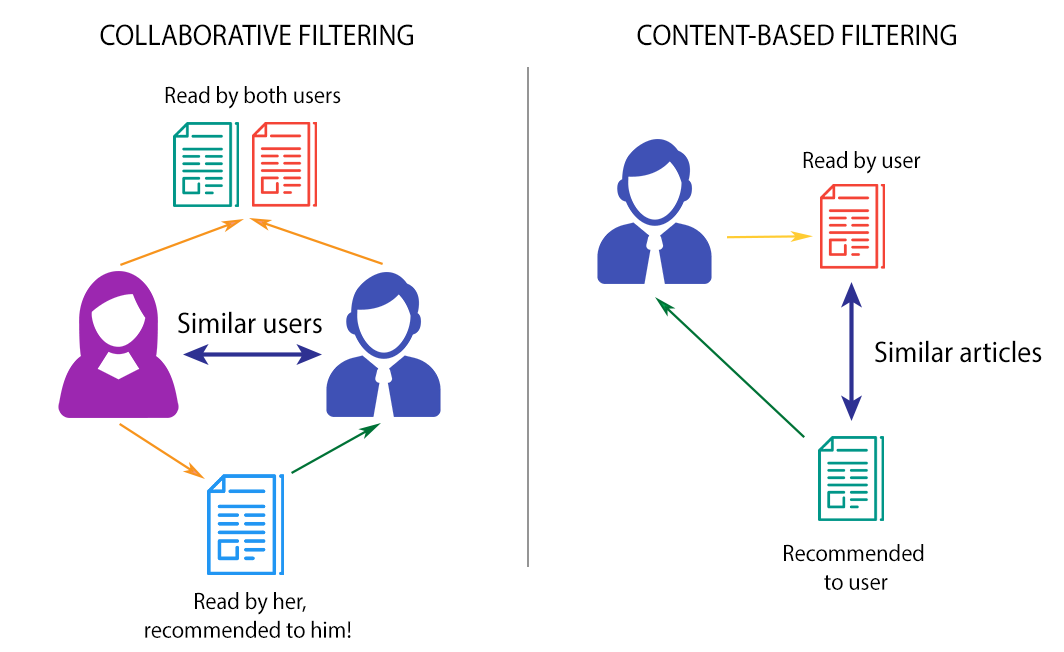

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
netflix_data['description'] = netflix_data['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_data['description'])
tfidf_matrix.shape

(8807, 18895)

The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.
Cosine similarity is a measure of similarity, often used to measure document similarity in text analysis

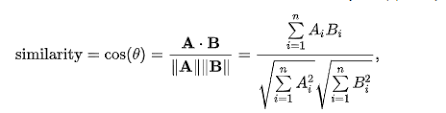

In [25]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(netflix_data.index, index=netflix_data['title']).drop_duplicates()



Defining Recommendation System Function


In [26]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data['title'].iloc[movie_indices]

At this point our recommendation system function is ready to use. After defining our recommendation system function we can use it to get recommendations. All we need to do is passing the content name as an argument

In [27]:
get_recommendations('Peaky Blinders')


7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [28]:
get_recommendations('Dark')


2874                   Altered Carbon
4629                           Maniac
1034                       Synchronic
626     Sophie: A Murder in West Cork
1117         Ibrahim a Fate to Define
4101                        Candyflip
4253       Black Mirror: Bandersnatch
869                  Who Killed Sara?
2979                     THE STRANGER
7348                        Love Rain
Name: title, dtype: object

Content based filtering on multiple metrics

Title

Cast

Director

Listed in


Plot
 


In [29]:
#Transforming NULLs to empty strings
missingfilled=netflix_data.fillna('')
missingfilled.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Data cleaning. Converting all words to their lower case form

In [30]:
def data_cleaning(x):
        return str.lower(x.replace(" ", ""))

In [31]:
#Selecting features which are going to filter model
features=['title','director','cast','listed_in','description']
missingfilled=missingfilled[features]

In [32]:
for feature in features:
    missingfilled[feature] = missingfilled[feature].apply(data_cleaning)
    
missingfilled.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


In [33]:
def content_include(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [34]:
missingfilled['soup'] = missingfilled.apply(content_include, axis=1)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
countvec = CountVectorizer(stop_words='english')
countvec_matrix = countvec.fit_transform(missingfilled['soup'])

cosine_sim2 = cosine_similarity(countvec_matrix, countvec_matrix)
missingfilled=missingfilled.reset_index()
indices = pd.Series(missingfilled.index, index=missingfilled['title'])

In [37]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data['title'].iloc[movie_indices]

In [38]:
get_recommendations_new('Dark', cosine_sim2)


260                 The Defeated
3604                    Sintonia
2053             Young Wallander
3744                     Unit 42
5404           The Truth Seekers
6323                 Black Heart
3789              Killer Ratings
4476       Terrorism Close Calls
4673    Inside the Criminal Mind
3855                  The Writer
Name: title, dtype: object

In [39]:
get_recommendations_new('Peaky Blinders', cosine_sim2)


3034                    Giri / Haji
5032    The Frankenstein Chronicles
8431          The Murder Detectives
4951                         Loaded
4809                  Kiss Me First
6922                   Happy Valley
2184                       Get Even
519                   I AM A KILLER
3789                 Killer Ratings
4476          Terrorism Close Calls
Name: title, dtype: object

In [40]:
get_recommendations_new('Black Mirror', cosine_sim2)


3045                                       Dracula
3551           The Dark Crystal: Age of Resistance
4262                                Watership Down
1301                               Behind Her Eyes
7017    How to Live Mortgage Free with Sarah Beeny
2979                                  THE STRANGER
5365                                         Vexed
69                  Stories by Rabindranath Tagore
1056                                Ajaibnya Cinta
1603                                  Alien Worlds
Name: title, dtype: object